In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

In [40]:
if 0:
    r_3d,m1,m2,x,y,z=np.loadtxt('C:\\Users\Sophia Milanov\Documents\Bachelorarbeit\data\\x-y-z.dat', usecols=(1,9,10,30,31,32), unpack=True)
else:
    r_3d,m1,m2,x,y,z=np.loadtxt('/home/sophia/Dokumente/Bachelorarbeit-2/x-y-z_IMBH1.dat', usecols=(1,9,10,30,31,32), unpack=True)
    
r_3d0=r_3d[0]
m10=m1[0]
m20=m2[0]
x0=x[0]
y0=y[0]
z0=z[0]

r_3d=r_3d[1:]
m1=m1[1:]
m2=m2[1:]
x=x[1:]
y=y[1:]
z=z[1:]

In [41]:
mges=m1+m2
r0=0.05
step=18
end=100
stepsize=((np.log10(end)-np.log10(r0))/step)
R=np.zeros(step)

r=np.logspace(np.log10(r0),np.log10(end),step+1)
r_i=r[:-1:]
r_a=r[1::]

In [42]:
M = np.zeros(step)
rho=np.zeros(step)
binwidth=r_a-r_i
r_error=binwidth/2

for n in range(step):
    inbin=(r_i[n]<r_3d) * (r_3d<=r_a[n]) #r_3d wird verwendet! creates boolean arrays woth true values if star is in bin distance
    M[n]=np.sum(m1[inbin])+np.sum(m2[inbin]) #mass array with both masses of binary system
    rho[n]=M[n]/((r_a[n]**2-r_i[n]**2)*np.pi) #calculates density of bin
    R[n]=np.mean(r_3d[inbin]) #calculates mean distance of bin
    print(np.sum(inbin))

#extrabin am anfang
M_extra=np.sum(m1[r_3d<r0])+np.sum(m2[r_3d<r0])
rho_extra=M_extra/(r0**2*np.pi)
R_extra=np.mean(r_3d[r_3d<r0])
#einfuegen in bereits angefertigte arrays an erster Stelle
M_final=np.insert(M,0,M_extra)
rho_final=np.insert(rho,0,rho_extra)
R_final=np.insert(R,0,R_extra)
rho_relerror=-2*r_error/R_final[1:]
rho_error=rho_relerror*rho_final[1:]

197
354
763
1777
3853
8733
20476
44814
86080
140764
187805
197447
161500
103557
55354
12779
175
50


/home/sophia/anaconda3/lib/python3.4/site-packages/IPython/kernel/__main__.py:6: RuntimeWarning: overflow encountered in exp
/home/sophia/anaconda3/lib/python3.4/site-packages/IPython/kernel/__main__.py:6: RuntimeWarning: overflow encountered in multiply


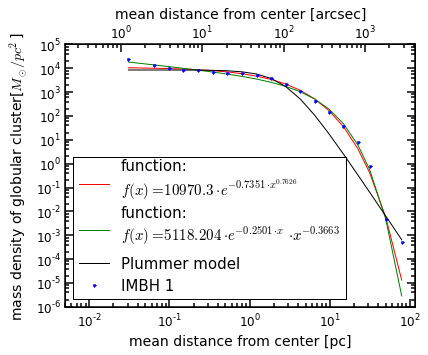

In [48]:
#defining fit function
def func(x,a,b,c):
    return a * np.exp((-b) * (x**c)) 

def func1(x,a,b,c):
    return a * np.exp(-b*x)*x**c

def Plummer(x,a,m):
    return (3*m)/(4*np.pi*(a**3))*(1+(x**2/a**2))**(-5/2)

def isochrones(x,a,b,m):
    return m*((3*(b+a)*(a**2)-(x**2)*(b+3*a))/(4*np.pi*((b+a)**3)*(a**3)))

#trying to optimize functions for given values R_final and Rho_final, know initial values from above
popt,pcov=curve_fit(func,R_final[1:],rho_final[1:],p0=[12000, 0.5, 0.5],sigma=rho_error[0:])
popt1,pcov1=curve_fit(func1,R_final[1:],rho_final[1:],sigma=rho_error[0:])
poptP,pcovP=curve_fit(Plummer,R_final[1:],rho_final[1:],sigma=rho_error[0:])
#poptI,pcovI=curve_fit(isochrones,R_final[1:],rho_final[1:],sigma=rho_error[0:])

#plotting
fig = plt.figure(figsize=(6,5))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()


ax1.loglog(R_final,func(R_final,*popt),c='r',label='function:\n$f(x)='+str(round(popt[0],1))+'\cdot e^{-'+str(round(popt[1],4))+'\cdot x^{'+str(round(popt[2],4))+'}}$')
ax1.loglog(R_final,func1(R_final,*popt1),c='g',label='function:\n$f(x)='+str(round(popt1[0],4))+'\cdot e^{-'+str(round(popt1[1],4))+'\cdot x}\cdot x^{'+str(round(popt1[2],4))+'}$')
ax1.loglog(R_final,Plummer(R_final,*poptP),c='k',label='Plummer model')
#ax1.loglog(R_final,isochrones(R_final,*poptI),label='isochrones')
ax1.loglog(R_final,rho_final,'b.',label='IMBH 1')
ax1.set_xlim(0.005,115)
ax1.set_xlabel('mean distance from center [pc]', fontsize=14)
ax1.set_ylabel('mass density of globular cluster[$M_\odot/pc^2$]', fontsize=14)
#ax1.grid(True)
ax1.legend(loc=0,prop={'size':15},numpoints=1)

ax2.set_xlim((0.005/5000)*360*3600/(2*np.pi),(100./5000)*360*3600/(2*np.pi)) #calculates x limits from parsec to arcsec
ax2.set_xscale('log')
ax2.set_xlabel('mean distance from center [arcsec]', fontsize=14)

ax1.spines['top'].set_linewidth(1.5)
ax1.spines['right'].set_linewidth(1.5)
ax1.spines['bottom'].set_linewidth(1.5)
ax1.spines['left'].set_linewidth(1.5)

ax1.tick_params(length=8,width=1.5,labelsize=12)
ax1.tick_params(which='minor',length=4,width=1.5)
ax2.tick_params(length=8,width=1.5,labelsize=12)
ax2.tick_params(which='minor',length=4,width=1.5)
fig.tight_layout()
fig.savefig('../../../Bachelorarbeit-Entwurf/Plots/density_prof_analytic.pdf',format='pdf')


In [7]:
print(popt)
print(popt1)
print(poptP)

[  1.30808024e+04   8.31705697e-01   7.42108912e-01]
[  5.64191582e+03   2.69782672e-01  -3.66511784e-01]
[  2.97557934e+00   1.01107348e+06]


In [8]:
mges=np.sum(m1[1:]+m2[1:])

In [9]:
r_a-r_i

array([  6.68100537e-03,   1.11445887e-02,   1.85902943e-02,
         3.10104799e-02,   5.17285982e-02,   8.62885025e-02,
         1.43937897e-01,   2.40102884e-01,   4.00515750e-01,
         6.68100537e-01,   1.11445887e+00,   1.85902943e+00,
         3.10104799e+00,   5.17285982e+00,   8.62885025e+00,
         1.43937897e+01,   2.40102884e+01,   4.00515750e+01])

In [10]:
poptP[1]

1011073.4800151697

In [11]:
mges

298431.16906324017